# Neural Network  
This script automates a neural network from the ground up using numpy.  
The inputs are 3 variables: temperature, wind, and cloud coverage, and attempts to predict whether a coat should be worn.  
Output is the probability that a coat should be worn.  
The NN uses the sigmoid activation function, log loss cost function, and stochastic gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
'''Class initializes the architecture of the NN. User inputs the number of neurons per layer,
the learning rate, and the number of epochs over which to train the network. Weights are 
initialized with random numbers with a mean of 0 and variance of 1'''
class Network:
    def __init__(self, layers, learning_rate, epochs):
        self.layers = layers
        self.num_layers = len(layers)  # Number of layers
        self.learning_rate = learning_rate  
        self.epochs = epochs
        self.w = [np.random.randn(j, i) for i,j in zip(self.layers[0:-1], self.layers[1:])]
        self.b = [np.random.randn(i, 1) for i in self.layers[1:]]
    
    
    # Propagates thru network using one training example x. Sigmoid activations function is used
    # Returns list of activations and zs
    def forward_prop(self, x):
        activations = [x]  # List of all activations
        zs = []  # list of all z's as calulated by wx + b where x is the input to the neuron
        
        # Loops over all layers of network minus the input layer
        for layer,_ in enumerate(self.layers[1:]):
            A = np.dot(self.w[layer], activations[layer]) + self.b[layer]
            zs.append(A)
            activations.append(self.sigmoid(A))

        return activations, zs
    
    
    # Calculates change in weights and biases based on gradient descent
    # Inputs are one training example (x), and expected output for that example (y)
    # Also calculates cost of output
    def back_prop(self, x, y):
        delta_w = [np.zeros(i.shape) for i in self.w]  # Same shape as weights
        delta_b = [np.zeros(i.shape) for i in self.b]  # Same shape as biases
        
        # Forward pass
        activations, zs = self.forward_prop(x)
        
        cost = self.calculate_cost(activations[-1], y)
        
        delta = (activations[-1] - y) * self.sigmoid_prime(zs[-1])
        delta_b[-1] = delta
        delta_w[-1] = np.dot(float(delta), activations[-2].T)
        
        # Backward pass
        for layer in range(2, len(self.layers)):
            z_sigmoid = self.sigmoid_prime(zs[-layer])
            error = np.dot(self.w[-layer+1].T, float(delta)) * z_sigmoid
            delta_b[-layer] = error
            delta_w[-layer] = np.dot(error, activations[-(layer+1)].T)
            
        return delta_w, delta_b, cost
    
    
    # Calculates sigmoid of z
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    # Calculates derivative of sigmoid(z)
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    
    # Caclulates log loss of one training example x
    def calculate_cost(self, x, y):
        cost = -(1/self.num_layers) * (y * np.log(x) + (1-y) * np.log(1-x))
        
        return cost
    
    
    # Plots cost per each epoch
    def cost_graph(self, costs):
        x = np.linspace(0, self.epochs, self.epochs)
        plt.plot(x, costs)
        plt.show()        
        
        
    # Trains network over one epoch using stochastic gradient descent
    def train(self, x):
        delta_w = [np.zeros((j,i)) for i,j in zip(self.layers[0:-1], self.layers[1:])]
        delta_b = [np.zeros((i,1)) for i in self.layers[1:]]
        
        total_cost = 0
        
        for inpt in x:
            del_w, del_b, cost = self.back_prop(inpt[0:-1], inpt[-1])
            delta_w = [i+j for i,j in zip(delta_w, del_w)]
            delta_b = [i+j for i,j in zip(delta_b, del_b)]
            
            total_cost += float(cost)
            
        self.w = [w - (self.learning_rate/len(x)*j) for w,j in zip(self.w, delta_w)]
        self.b = [b - (self.learning_rate/len(x)*j) for b,j in zip(self.b, delta_b)]
        
        return total_cost
        

In [ ]:
# Input Data
# Initialize result, temperature, wind speed, and cloud coverage arrays
put_coat_on = np.array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])  # coat = 1 ; no coat = 0
temperature = np.array([65, 12, 71, 68, 88, 54, 62, 13, 44, 72, 26, 59])  # Degrees in F
wind_speed = np.array([1, 8, 3, 4, 9, 12, 0, 5, 12, 6, 3, 0])  # speed in mph
cloud_coverage = np.array([0.1, 0.9, 0.3, 0.0, 0.6, 0.5, 0.0, 1.0, 0.7, 0.2, 0.0, 0.2])  # 0 = no clouds ; 1 = full cloud coverage

# Scale variables down using using min-max scaling
temp_scaled = [(i-np.min(temperature))/(np.max(temperature)-np.min(temperature)) for i in temperature]
wind_scaled = [(i-np.min(wind_speed))/(np.max(wind_speed)-np.min(wind_speed)) for i in wind_speed]
cloud_scaled = [(i-np.min(cloud_coverage))/(np.max(cloud_coverage)-np.min(cloud_coverage)) for i in cloud_coverage]

# Input Array. Each entry is a (4,1) array with the last row as the expected output
features = np.array([[[i],[j],[k],[l]] for i,j,k,l in zip(temp_scaled, wind_scaled, cloud_scaled, put_coat_on)])

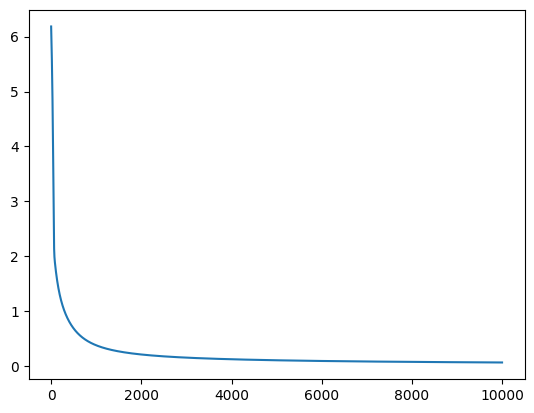

Final Cost: 0.07


In [72]:
# Initialize Network
n = Network([3, 10, 1], 0.5, 10000)
    
costs = []

for i in range(n.epochs):
    cost = n.train(features)
    costs.append(cost)
    
n.cost_graph(costs)

print(f"Final Cost: {np.round(costs[-1], 2)}")